In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point
from scipy.spatial import cKDTree

In [2]:
# Open the desired year of nsrdb data
year = "2013"
f = h5pyd.File(f"/nrel/nsrdb/v3/nsrdb_{year}.h5", 'r')
ghi = f['ghi']

In [3]:
# Unlike the gridded WTK data the NSRDB is provided as sparse time-series dataset.
# The quickest way to find the nearest site it using a KDtree
dset_coords = f['coordinates'][...]
tree = cKDTree(dset_coords)
def nearest_site(tree, lat_coord, lon_coord):
    lat_lon = np.array([lat_coord, lon_coord])
    dist, pos = tree.query(lat_lon)
    return pos

## Select Lat Long

In [4]:
FortRoss = (38.51265, -123.24647)
siteLocation = FortRoss
site_idx = nearest_site(tree, siteLocation[0], siteLocation[1] )

print("Desired Coordinates: \t {}".format(FortRoss))
print("Coordinates of nearest point: \t {}".format(dset_coords[site_idx]))
print("Site index: \t\t {}".format(site_idx))

Desired Coordinates: 	 (38.51265, -123.24647)
Coordinates of nearest point: 	 [  38.53 -123.26]
Site index: 		 131123


## Display Selected Site

/var/folders/qc/5h73dwnj6d75cbb1b8b1r1f80000gn/T/ipykernel_29012/3482203708.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


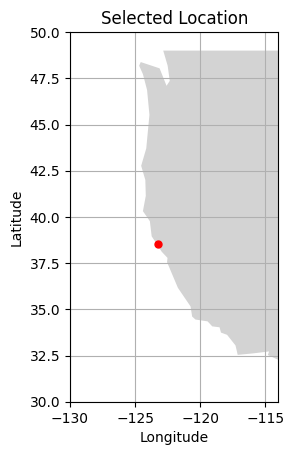

In [5]:
# Load a map of the US
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_map = gdf[gdf.name == "United States of America"]

# Plot the map
fig, ax = plt.subplots()
us_map.plot(ax=ax, color='lightgrey')

# Adjust the plot limits to focus on California
ax.set_xlim([-130, -114])
ax.set_ylim([30, 50])

# Plot the latitude and longitude as a point on the map
lat, lon = siteLocation
plt.plot(lon, lat, marker='o', color='red', markersize=5)
plt.title('Selected Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

Text(0.5, 1.0, 'FR ghi in 2013')

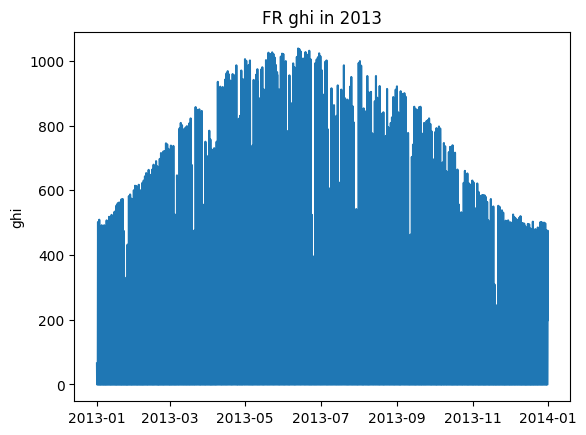

In [6]:
# Get the entire 2012 timeseries data for a point in FR
tseries = ghi[:, site_idx] / ghi.attrs['psm_scale_factor']
time_index = pd.to_datetime(f['time_index'][...].astype(str))
plt.plot(time_index, tseries)
plt.ylabel("ghi")
plt.title(f"FR ghi in {year}")